# 1. Data Load and Preprocess
* Load the dataset into a Pandas DataFrame
* This dataset contains information related to student achievement and treatment status for a growth mindset intervention.
* The columns represent various covariates, including demographic information and school-level characteristics.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
dataset = pd.read_csv('../../data/analysis_data/dataset.csv')
print(dataset.info())
print(dataset.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10391 entries, 0 to 10390
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   schoolid  10391 non-null  int64  
 1   Z         10391 non-null  int64  
 2   Y         10391 non-null  float64
 3   S3        10391 non-null  int64  
 4   C1        10391 non-null  int64  
 5   C2        10391 non-null  int64  
 6   C3        10391 non-null  int64  
 7   XC        10391 non-null  int64  
 8   X1        10391 non-null  float64
 9   X2        10391 non-null  float64
 10  X3        10391 non-null  float64
 11  X4        10391 non-null  float64
 12  X5        10391 non-null  float64
dtypes: float64(6), int64(7)
memory usage: 1.0 MB
None
   schoolid  Z         Y  S3  C1  C2  C3  XC        X1        X2        X3  \
0        76  1  0.081602   6   4   2   1   4  0.334544  0.648586 -1.310927   
1        76  1 -0.385869   4  12   2   1   4  0.334544  0.648586 -1.310927   
2        76  1  0

# Interpretation of DataSet structure
* Dataset Overview:

    The dataset contains 10,391 rows (representing individual students or observations) and 13 columns (representing variables such as school-level covariates, student-level covariates, treatment, and outcomes).
    All variables have non-null values, meaning there are no missing data points in this dataset,No need to handle missing values here.

* Data Types:

    - int64: Used for categorical and binary variables such as schoolid, Z (treatment indicator), and categorical covariates like C1, C2, C3, S3, and XC.
    - float64: Used for continuous numerical variables such as the outcome variable (Y), and the school-level variables (X1, X2, X3, X4, X5).
    - Categorical variables: Currently stored as int64, need to treat them as categorical (especially for the variables C1, C2, C3, XC). Will have to encode these variables (e.g., one-hot encoding) before using them in machine learning models.
    - Continuous variables: Variables like Y, X1 to X5 are already in the right format and can be directly used in models. However, might have to normalize or standardize these features depending on the models being used (e.g., linear regression or neural networks might require feature scaling).


# Categorical Encoding 
one-hot encoding to categorical variables (C1, C2, C3, and XC), as these variables are stored as int64 but are actually categorical. 
 pd.get_dummies() to ensure they are ready for use in machine learning models.

In [2]:
# Categorical Encoding
# Categorical Encoding using one-hot encoding for categorical variables
df_encoded = pd.get_dummies(dataset, columns=['C1', 'C2', 'C3', 'XC'], drop_first=True)

# Display the first few rows of the encoded dataset
print(df_encoded.head())


   schoolid  Z         Y  S3        X1        X2        X3        X4  \
0        76  1  0.081602   6  0.334544  0.648586 -1.310927  0.224077   
1        76  1 -0.385869   4  0.334544  0.648586 -1.310927  0.224077   
2        76  1  0.398184   6  0.334544  0.648586 -1.310927  0.224077   
3        76  1 -0.175037   6  0.334544  0.648586 -1.310927  0.224077   
4        76  1  0.884583   6  0.334544  0.648586 -1.310927  0.224077   

         X5   C1_2  ...  C1_12  C1_13  C1_14  C1_15   C2_2   C3_1   XC_1  \
0 -0.426757  False  ...  False  False  False  False   True   True  False   
1 -0.426757  False  ...   True  False  False  False   True   True  False   
2 -0.426757  False  ...  False  False  False  False   True  False  False   
3 -0.426757  False  ...  False  False  False  False   True  False  False   
4 -0.426757  False  ...  False  False  False  False  False  False  False   

    XC_2   XC_3  XC_4  
0  False  False  True  
1  False  False  True  
2  False  False  True  
3  False  Fals

pd.get_dummies(): This function is used to perform one-hot encoding, where categorical variables are transformed into binary columns representing the presence of each category.
drop_first=True: This avoids the dummy variable trap by dropping one of the categories for each variable (i.e., using k−1 categories for a variable with k unique values).

# 2. Data Exploration (EDA)
 Exploratory data analysis (EDA) to understand the distributions of variables and relationships between them.

## 2.1 Visualizing Continuous Variables: Histograms and Box Plots


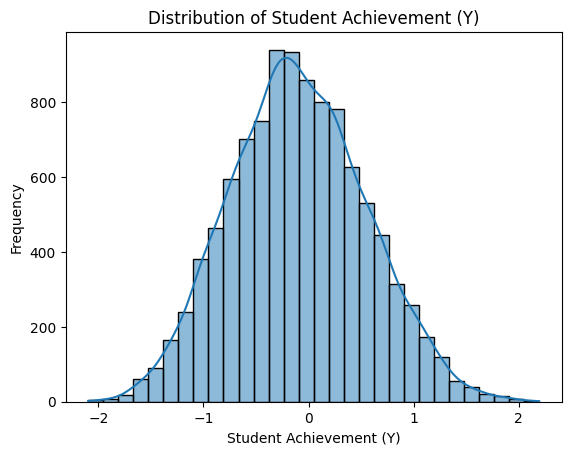

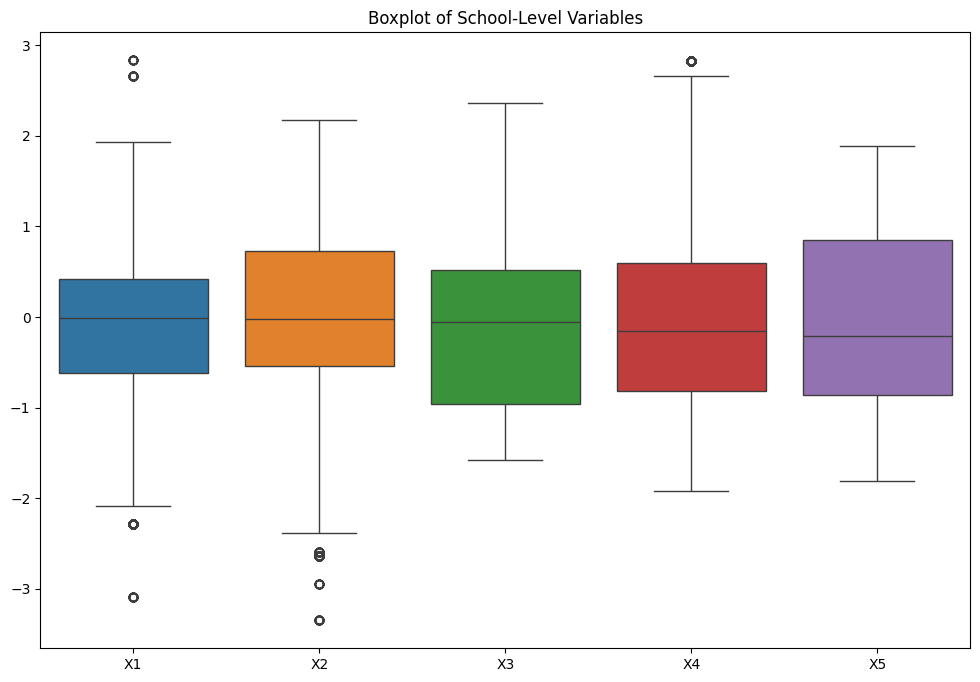

In [3]:
# histograms for the outcome variable Y (student achievement) and the school-level covariates (X1, X2, X3, X4, X5
import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Student Achievement (Y)
sns.histplot(dataset['Y'], bins=30, kde=True)
plt.title("Distribution of Student Achievement (Y)")
plt.xlabel("Student Achievement (Y)")
plt.ylabel("Frequency")
plt.show()

# Box plot for School-Level Variables
plt.figure(figsize=(12, 8))
sns.boxplot(data=dataset[['X1', 'X2', 'X3', 'X4', 'X5']])
plt.title("Boxplot of School-Level Variables")
plt.show()


### Histogram of Student Achievement (Y)
Symmetrical Distribution: The histogram shows that the distribution of the student achievement outcome (Y) is approximately normal. The curve peaks near zero and tapers off symmetrically on both sides, indicating that the majority of students have a student achievement score close to the mean (0).

KDE Plot: The Kernel Density Estimation (KDE) plot overlaid on the histogram confirms the normal distribution pattern. The smooth curve follows the histogram bars closely, showing that the dataset doesn't have heavy skewness or irregular distributions.

No Outliers: There are no significant outliers or extreme values in this distribution, as the bulk of the data is concentrated between -2 and 2.

This normal distribution of Y suggests that models can likely assume normality for the outcome variable, making statistical tests and linear models  more reliable.

### Boxplot of School-Level Variables (X1 to X5)

The boxplots display the distribution of the school-level covariates (X1, X2, X3, X4, and X5).

X1 (Fixed Mindset): The boxplot shows a relatively compact distribution, with no extreme outliers. The range spans approximately from -1.5 to 2. There are a couple of minor outliers on the lower end, but nothing particularly extreme.

X2 (School Achievement Level): This variable exhibits a wider range, with some noticeable outliers on the lower end (below -2). Most of the data, however, lies within a reasonable range centered around 0.

X3 (Racial/Ethnic Minority Composition): The distribution of X3 seems fairly balanced, with no extreme outliers. The data ranges from -2 to around 1.5.

X4 (Poverty Concentration): X4 shows a similar pattern to X3, with a few outliers on the lower end and most data points centered around 0.

X5 (Total Student Population): This variable appears to be the most symmetric, with the interquartile range (IQR) between -1 and 1. There are no significant outliers.


### Exploring Interaction Effects Between Z and School-Level Covariates (X1 to X5)
Interaction effects occur when the effect of one variable (e.g., the treatment Z) on the outcome Y depends on the level of another variable (e.g., school-level covariates). To explore these effects, we can add interaction terms to a regression model.
    -Preparing Interaction Terms: Creating interaction terms between the binary treatment variable (Z) and each school-level covariate (X1, X2, ..., X5)
    - Using a linear regression model to assess the interaction effects.
    -Examining the coefficients or feature importance of the interaction terms to understand how the treatment's effect on Y changes based on school-level covariates.


In [4]:
import statsmodels.api as sm
import pandas as pd

# Step 1: Create interaction terms between Z and school-level covariates (X1 to X5)
dataset['Z_X1'] = dataset['Z'] * dataset['X1']
dataset['Z_X2'] = dataset['Z'] * dataset['X2']
dataset['Z_X3'] = dataset['Z'] * dataset['X3']
dataset['Z_X4'] = dataset['Z'] * dataset['X4']
dataset['Z_X5'] = dataset['Z'] * dataset['X5']

# Step 2: Define independent variables and dependent variable (Y)
X = dataset[['Z', 'X1', 'X2', 'X3', 'X4', 'X5', 'Z_X1', 'Z_X2', 'Z_X3', 'Z_X4', 'Z_X5']]
Y = dataset['Y']

# Add constant term for the regression model
X = sm.add_constant(X)

# Step 3: Fit a linear regression model with interaction terms
model = sm.OLS(Y, X).fit()

# Step 4: Summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     68.77
Date:                Sat, 16 Nov 2024   Prob (F-statistic):          1.55e-149
Time:                        17:05:43   Log-Likelihood:                -9789.5
No. Observations:               10391   AIC:                         1.960e+04
Df Residuals:                   10379   BIC:                         1.969e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1913      0.007    -25.638      0.0

### Interpretation of the OLS Regression Results
 Ordinary Least Squares (OLS) regression model that includes interaction terms between the treatment variable (Z) and the school-level covariates (X1 to X5).
 R-squared: 0.068: This means that only 6.8% of the variation in student achievement is explained by the model. This is low, suggesting that the model is not explaining much of the variance in student achievement
 Adjusted R-squared: 0.067: Adjusted for the number of predictors, this value is similar to the R-squared, which indicates no overfitting

F-statistic: 68.77 (p-value = 1.55e-149): The overall model is statistically significant because the p-value is very small (close to zero). This means that at least one of the predictors in the model has a significant effect on the outcome (Y).


### Coefficients and Interpretation
The table shows the coefficients for each predictor and their interaction terms, along with their statistical significance (p-values)
* Intercept (const): The negative intercept (-0.1913) is the predicted value of Y when all other variables are zero, but this doesn't carry practical significance because most variables are not centered around zero
* Treatment (Z): The positive coefficient (0.2941, p < 0.001) suggests that the growth mindset intervention has a positive and statistically significant effect on student achievement. On average, students who received the intervention have a 0.294 higher achievement score than those who did not
* X1 (Fixed Mindset): The coefficient for X1 is -0.0748 (p < 0.001), meaning that schools with higher pre-intervention fixed mindsets tend to have slightly lower student achievement scores.
* X2 (School Achievement): The coefficient for X2 is -0.0177, but it is not statistically significant (p = 0.131), meaning prior school achievement does not significantly affect the outcome in this model.
* X3 (Minority Composition): The coefficient for X3 is 0.0476 (p < 0.001), meaning that higher racial/ethnic minority composition is associated with slightly higher student achievement in this model.
* X4 (Poverty Concentration) and X5 (Total Student Population): These variables are not statistically significant, meaning they don't have a meaningful impact on student achievement based on this model.*





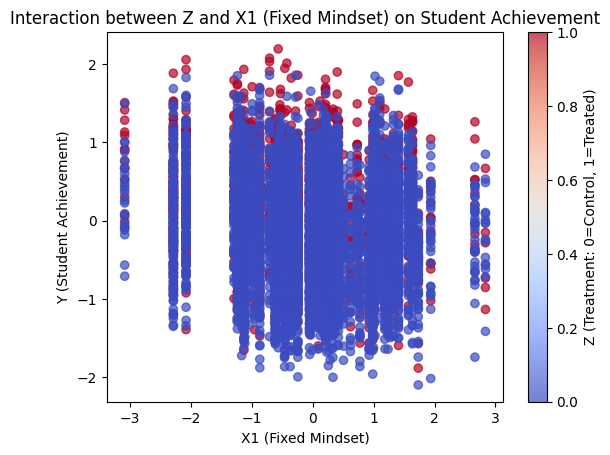

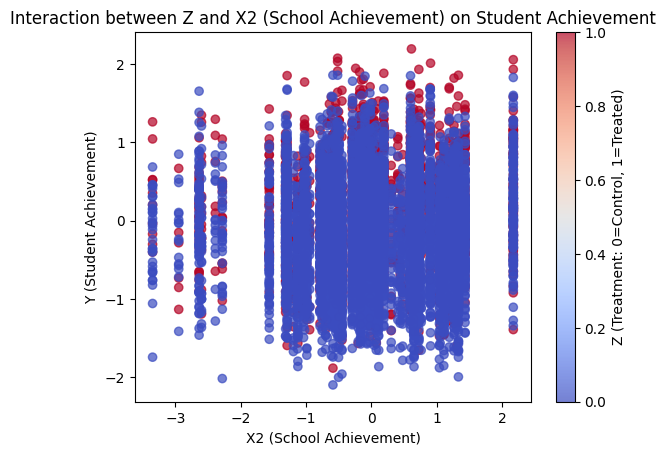

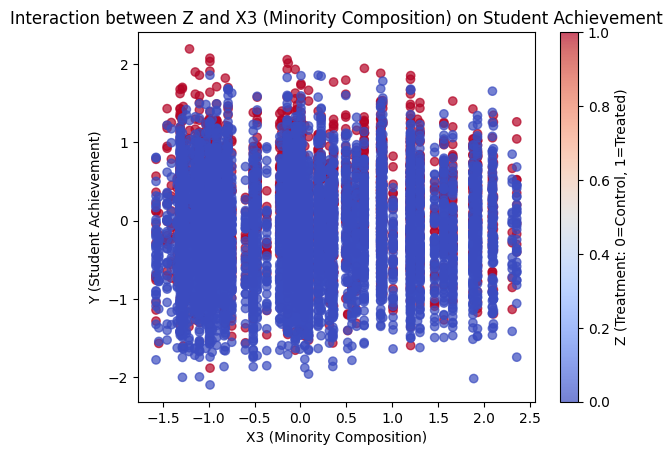

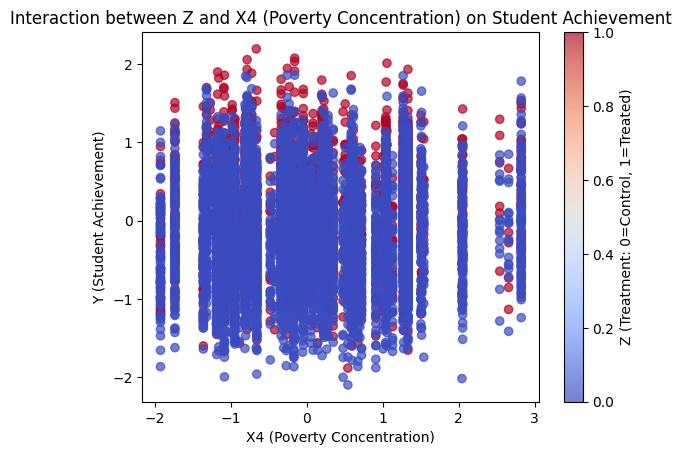

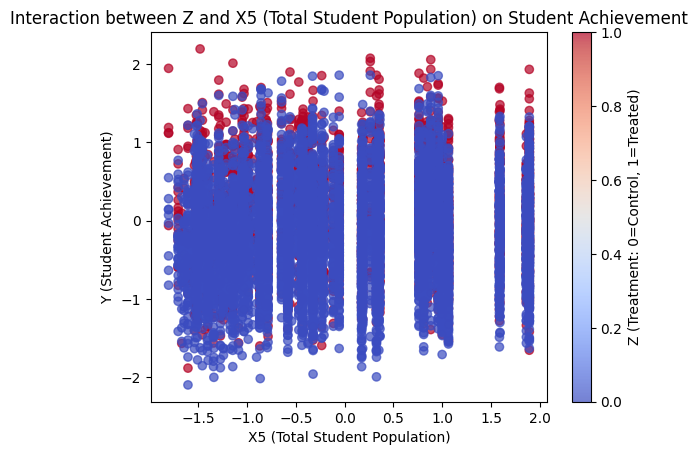

In [5]:
# Visualizing Interaction Effects:
import matplotlib.pyplot as plt
import numpy as np

# List of covariates to plot
covariates = ['X1', 'X2', 'X3', 'X4', 'X5']
covariate_names = [
    'X1 (Fixed Mindset)',
    'X2 (School Achievement)',
    'X3 (Minority Composition)',
    'X4 (Poverty Concentration)',
    'X5 (Total Student Population)'
]

# Iterate over each covariate to create scatter plots
for covariate, covariate_name in zip(covariates, covariate_names):
    plt.scatter(dataset[covariate], dataset['Y'], c=dataset['Z'], cmap='coolwarm', alpha=0.7)
    plt.title(f"Interaction between Z and {covariate_name} on Student Achievement")
    plt.xlabel(covariate_name)
    plt.ylabel('Y (Student Achievement)')
    plt.colorbar(label='Z (Treatment: 0=Control, 1=Treated)')
    plt.show()



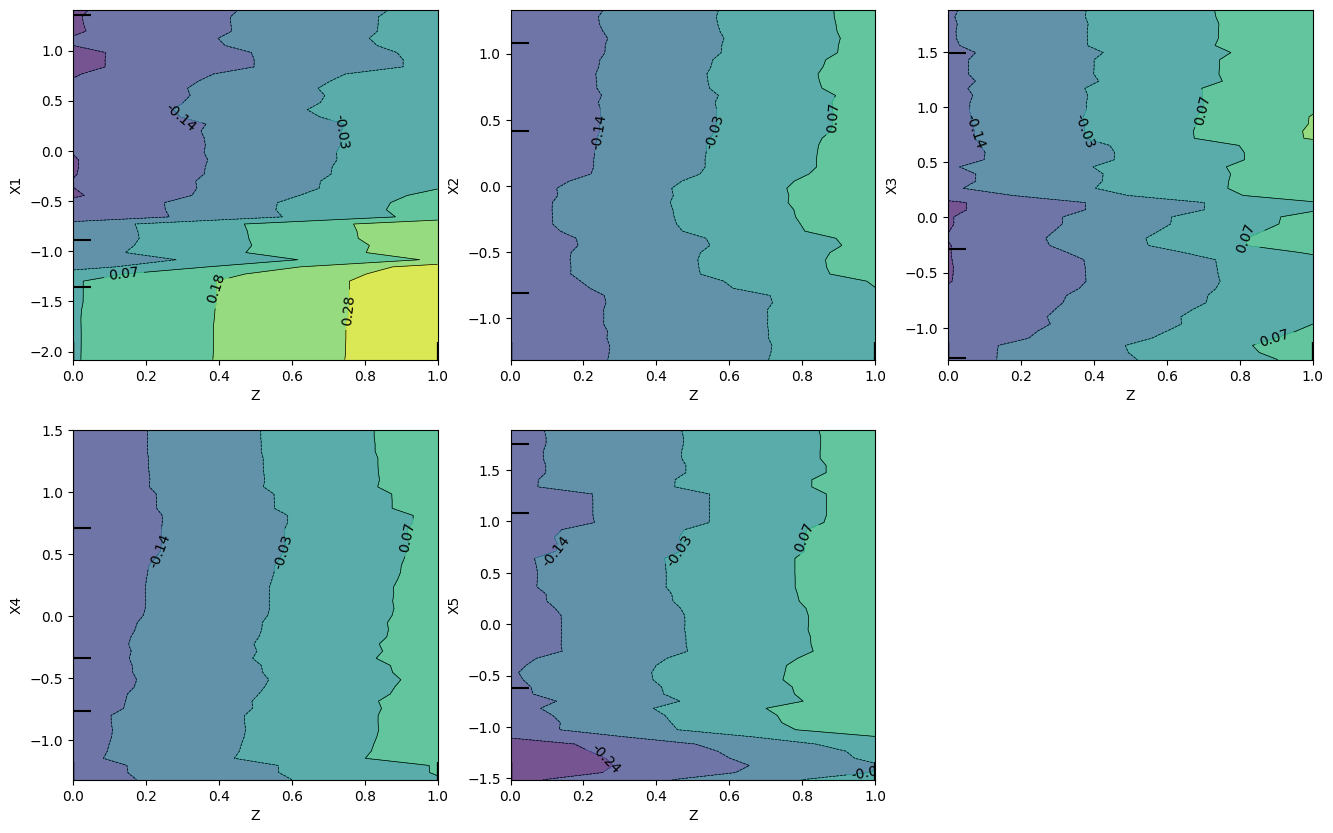

In [6]:
# Partial Dependence Plots (PDP)
# Partial Dependence Plots can help show the marginal effect of a feature (covariate) on the predicted outcome while holding other features constant. 
# #PDPs can give a clearer picture of the interaction effects across covariates, especially in tree-based models
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Fit the Random Forest model
rf = RandomForestRegressor()
X = dataset[['Z', 'X1', 'X2', 'X3', 'X4', 'X5']]  # Features
Y = dataset['Y']  # Outcome
rf.fit(X, Y)

# Create a larger figure for the Partial Dependence Plots
fig, ax = plt.subplots(figsize=(16, 10))# Plot Partial Dependence for treatment Z and all other variables

# Plot Partial Dependence for treatment Z and all other variables
PartialDependenceDisplay.from_estimator(
    rf, X, features=[('Z', 'X1'), ('Z', 'X2'), ('Z', 'X3'), ('Z', 'X4'), ('Z', 'X5')], grid_resolution=50, ax=ax
)
plt.show()



### Results 
* The plot suggests that the growth mindset intervention has a positive effect on student achievement, especially in schools with a moderate fixed mindset. However, in schools with a strong fixed mindset (lower X1), the intervention's effect on student achievement is somewhat weaker

### Takeaways
* Consistent Treatment Effect:
Across all covariates, the treatment (Z=1) has a generally positive effect on student achievement, as shown by the higher predicted values for Z=1. However, the strength of the interaction between the treatment and school-level covariates (X1 to X5) appears to be relatively weak.

* Effect of Fixed Mindset (X1):
The strongest interaction is observed between the treatment and fixed mindset (X1). The intervention has a stronger impact in schools with moderate to lower fixed mindsets, as indicated by the contours shifting towards higher predicted values (lighter colors) as X1 increases toward 0 or positive values.

* Other Covariates (X2 to X5):
The other covariates (X2 to X5), including school achievement, minority composition, poverty concentration, and total student population, show little to no interaction with the treatment effect. This suggests that the intervention’s impact is consistent across various school contexts.

* The intervention works across different school types, with only modest differences in effectiveness based on school-level characteristics.



## 2.2 Visualizing Categorical Variables: Count Plots
Count plots to visualize the distribution of the treatment variable (Z), as well as other categorical variables like C1, C2, and C3

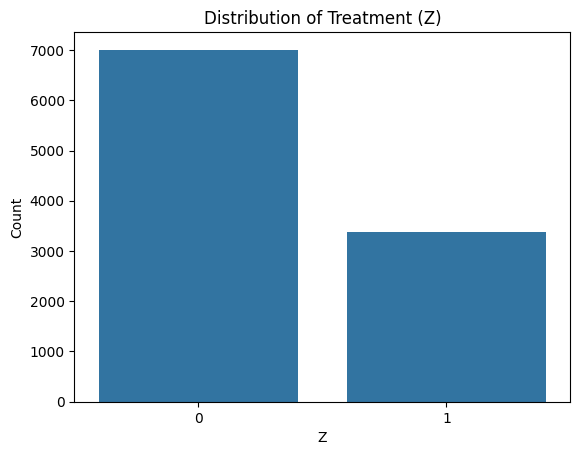

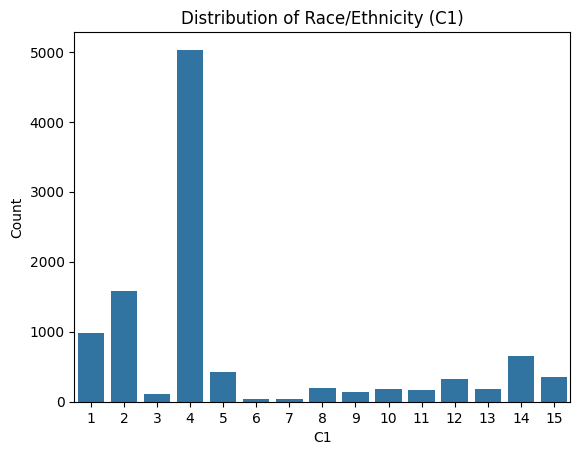

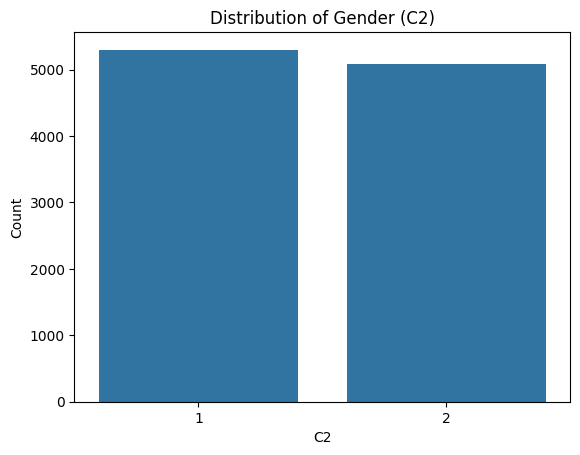

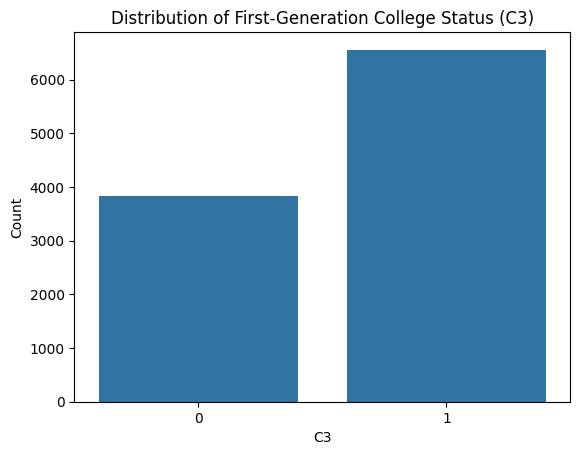

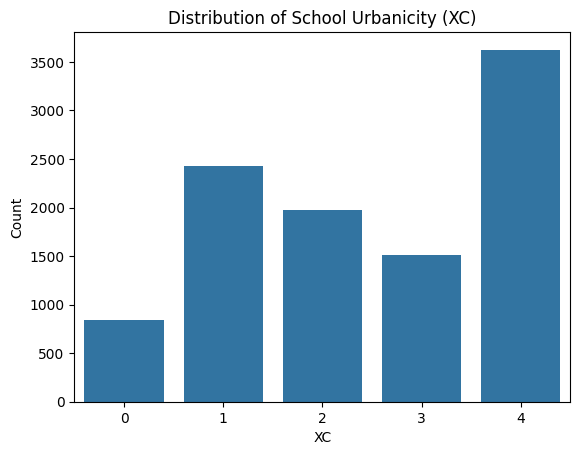

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of categorical variables
categorical_vars = ['Z', 'C1', 'C2', 'C3', 'XC']
titles = {
    'Z': 'Distribution of Treatment (Z)',
    'C1': 'Distribution of Race/Ethnicity (C1)',
    'C2': 'Distribution of Gender (C2)',
    'C3': 'Distribution of First-Generation College Status (C3)',
    'XC': 'Distribution of School Urbanicity (XC)'
}

# Iterate over categorical variables and create count plots
for var in categorical_vars:
    sns.countplot(x=var, data=dataset)
    plt.title(titles[var])
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.show()


* Distribution of Treatment (Z)
    The majority of students (around 7,000) are in the control group (Z=0), while a smaller portion (around 3,000) are in the treatment group (Z=1). This shows an imbalance between the treatment and control groups, which should be considered when analyzing the effect of the intervention
* Distribution of Race/Ethnicity (C1)
    Race/ethnicity group 4 dominates the dataset, with over 5,000 students, while other groups (like 1, 2, 5, etc.) have fewer students. Many race/ethnicity groups (e.g., 3, 7, 8, 9, etc.) have very small representations, which may affect statistical power when analyzing race-based effects. Imbalance in race/ethnicity distribution is evident, and care should be taken when conducting subgroup analysis.
* Distribution of Gender (C2)
    The distribution of gender is fairly balanced between the two categories, with each group containing around 5,000 students. This balance suggests that gender-related analyses can be conducted without much concern for imbalance between the two groups.
* Distribution of First-Generation College Status (C3)
    There are more first-generation college students (C3=1) than non-first-generation students, with around 6,500 first-generation students and around 4,000 non-first-generation students.This suggests a higher proportion of students who are the first in their families to attend college, which might be a key demographic in the analysis.
* Distribution of School Urbanicity (XC)
    The distribution across urbanicity categories is more varied, with certain urbanicity groups having higher representation than others. Depending on the category definitions, this can affect analyses related to the impact of urban versus rural settings on student outcomes.




## 2.3 Correlation Matrix for Continuous Variables

A correlation matrix to check how continuous variables relate to each other and to the outcome (Y).

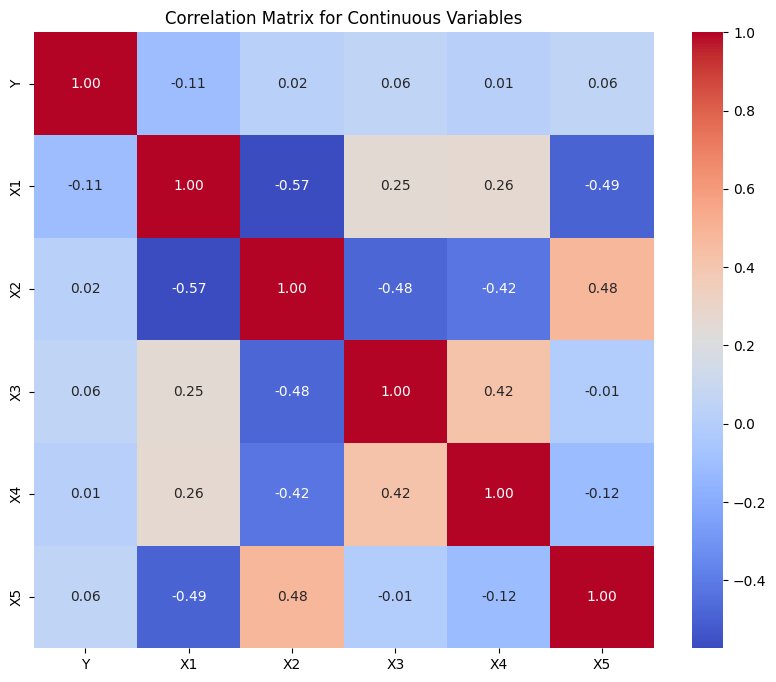

In [8]:
# Correlation matrix for continuous variables
corr_matrix = dataset[['Y', 'X1', 'X2', 'X3', 'X4', 'X5']].corr()

# Plot heatmap for correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Continuous Variables")
plt.show()


The correlation matrix heatmap generated shows the pairwise correlation between the continuous variables in the dataset
* Correlation of Y (Student Achievement) with Other Variables:

    * Y and X1: There is a negative correlation (-0.11) between student achievement and fixed mindset. This means that higher fixed mindset levels are slightly associated with lower student achievement.
    * Y and X2: A very weak positive correlation (0.02), suggesting that school achievement levels (from prior cohorts) have almost no linear relationship with current student achievement.
    * Y and X3: A positive correlation (0.06) with minority composition, but the correlation is weak. This indicates a slight association between minority composition and higher student achievement.
    * Y and X4: A very weak positive correlation (0.01) with poverty concentration. This suggests that poverty concentration at the school level has almost no linear effect on student achievement in this dataset
    * Y and X5: A positive correlation (0.06) with total student population, though it’s also weak. This shows a minimal association between school size and student achievement.

* Interrelationships Between the School-Level Covariates:

    * X1 and X2: A strong negative correlation (-0.57). This suggests that schools with a higher fixed mindset tend to have lower achievement levels from prior cohorts.
    * X1 and X3: A moderate positive correlation (0.25), indicating that schools with higher fixed mindset levels tend to have a larger minority composition.
    * X2 and X3: A moderate negative correlation (-0.48), showing that schools with higher prior achievement tend to have a lower minority composition.
    * X2 and X5: A moderate positive correlation (0.48), suggesting that larger schools (by total student population) tend to have higher achievement levels from previous cohorts.
    * X3 and X4: A moderate positive correlation (0.42), indicating that schools with a higher minority composition also tend to have higher poverty concentrations.
    * X4 and X5: A weak negative correlation (-0.12), suggesting that smaller schools tend to have higher poverty concentrations, though the relationship is weak.
* Takeaways
    * The correlations with Y (student achievement) are quite weak, meaning that none of the school-level covariates have a strong linear relationship with student achievement. This suggests that other factors (possibly unaccounted for in these variables) might be driving student performance.
    * The relationship between X1 (fixed mindset) and X2 (school achievement) is stronger, indicating that schools with a higher fixed mindset tend to have lower achievement levels in prior cohorts.
    * Minority composition (X3) and poverty concentration (X4) show some moderate relationships with other school-level variables, especially between each other, suggesting that these demographic factors are correlated in this dataset
* To consider 
    * The weak correlations with the outcome (Y) suggests while modeling student achievement, non-linear models or interactions between variables may be more useful than assuming a simple linear relationship.
    * The stronger relationships between school-level covariates (like X1 and X2) could indicate that school culture (as represented by fixed mindset) and past achievement are closely tied, which might have implications for the   effectiveness of interventions in different school environments.

# Data distribution acroos all the features

In [9]:
# Columns are renamed to more descriptive names for clarity.
data = dataset.rename(columns={
        'Y': 'StudentAchievementScore',
        'Z': 'GrowthMindsetIntervention',
        'S3': 'FutureSuccessExpectations',
        'C1': 'StudentRaceEthnicity',
        'C2': 'StudentGender',
        'C3': 'FirstGenCollegeStatus',
        'XC': 'SchoolUrbanicity',
        'X1': 'PreInterventionFixedMindset',
        'X2': 'SchoolAchievementLevel',
        'X3': 'SchoolMinorityComposition',
        'X4': 'PovertyConcentration',
        'X5': 'TotalStudentPopulation'
    })

In [10]:
# Define covariates, treatment, and outcome
covariate_cols = ['S3', 'C1', 'C2', 'C3', 'XC', 'X1', 'X2', 'X3', 'X4', 'X5']
treatment_col = 'Z'
outcome_col = 'Y'
# Split the data into training and testing sets
# stratification to ensure that the proportion of treated and control individuals in Z is maintained in both training and test sets
train_data, test_data = train_test_split(dataset, test_size=0.3, random_state=42, stratify=dataset[treatment_col])


Z
0    4904
1    2369
Name: count, dtype: int64


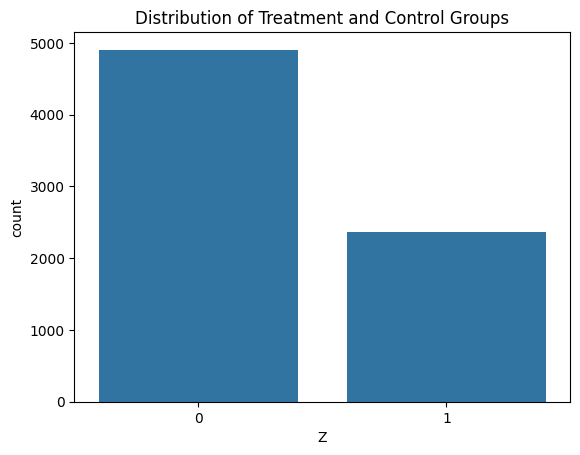

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt 
# Count the number of treated and control individuals
treatment_counts = train_data[treatment_col].value_counts()
print(treatment_counts)

# Visualize the distribution of treatment and control groups
import seaborn as sns
sns.countplot(x=treatment_col, data=train_data)
plt.title("Distribution of Treatment and Control Groups")
plt.show()

In [12]:
# Count the occurrences of each group 
group_counts = data['GrowthMindsetIntervention'].value_counts()

# Calculate proportions
group_proportions = group_counts / len(data)

print("Group Counts:")
print(group_counts)

print("\nGroup Proportions:")
print(group_proportions)


Group Counts:
GrowthMindsetIntervention
0    7007
1    3384
Name: count, dtype: int64

Group Proportions:
GrowthMindsetIntervention
0    0.674334
1    0.325666
Name: count, dtype: float64


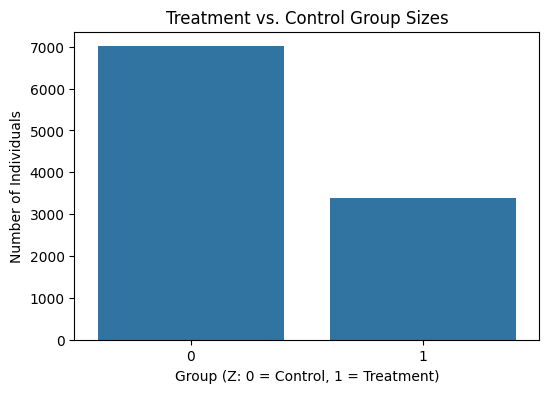

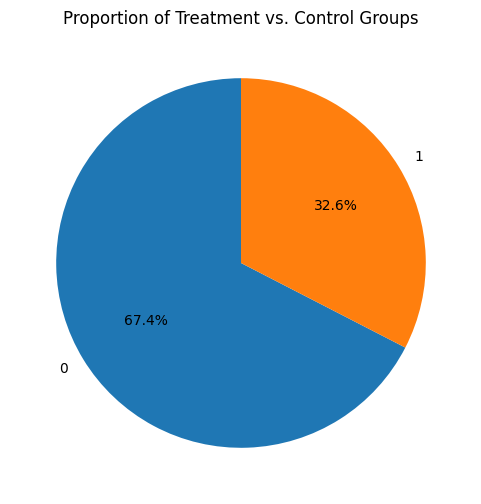

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for group counts
plt.figure(figsize=(6, 4))
sns.barplot(x=group_counts.index, y=group_counts.values)
plt.title('Treatment vs. Control Group Sizes')
plt.xlabel('Group (Z: 0 = Control, 1 = Treatment)')
plt.ylabel('Number of Individuals')
plt.show()

# Pie chart for group proportions
plt.figure(figsize=(6, 6))
plt.pie(group_proportions, labels=group_proportions.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Treatment vs. Control Groups')
plt.show()


In [14]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(index=data['GrowthMindsetIntervention'], columns='count')

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("The groups are significantly imbalanced.")
else:
    print("The groups are not significantly imbalanced.")


Chi-Square Statistic: 0.0
P-Value: 1.0
The groups are not significantly imbalanced.


                           FutureSuccessExpectations  StudentRaceEthnicity  \
GrowthMindsetIntervention                                                    
0                                           5.222349              5.241045   
1                                           5.362884              5.185875   

                           StudentGender  FirstGenCollegeStatus  \
GrowthMindsetIntervention                                         
0                               1.498787               0.646068   
1                               1.471631               0.599586   

                           SchoolUrbanicity  PreInterventionFixedMindset  \
GrowthMindsetIntervention                                                  
0                                  2.442272                    -0.009394   
1                                  2.459220                    -0.104777   

                           SchoolAchievementLevel  SchoolMinorityComposition  \
GrowthMindsetIntervention        

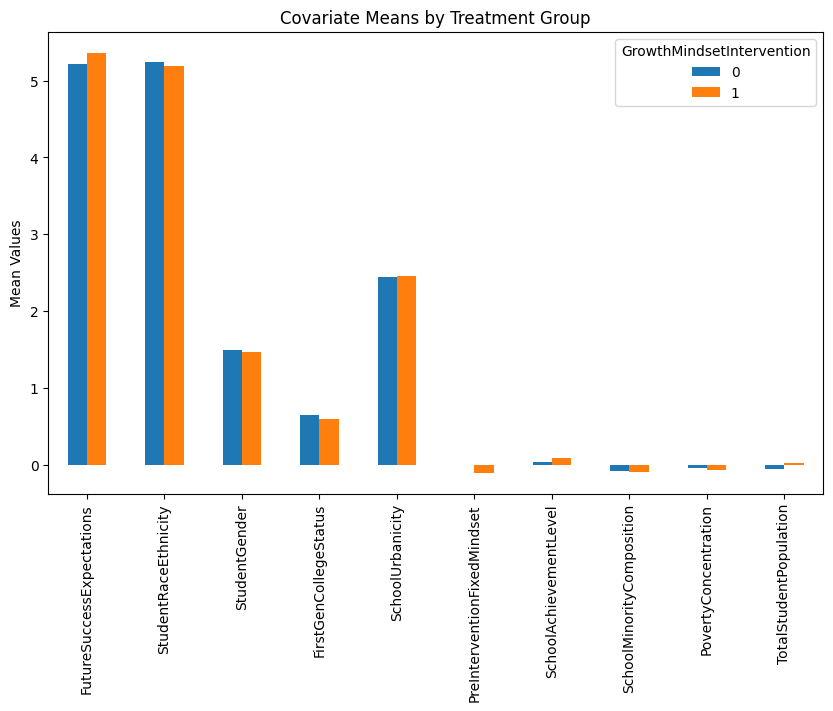

In [15]:
# Compare mean values of covariates between treatment and control groups
renamed_covariate_cols = [
    'FutureSuccessExpectations',
    'StudentRaceEthnicity',
    'StudentGender',
    'FirstGenCollegeStatus',
    'SchoolUrbanicity',
    'PreInterventionFixedMindset',
    'SchoolAchievementLevel',
    'SchoolMinorityComposition',
    'PovertyConcentration',
    'TotalStudentPopulation'
]

covariate_means = data.groupby('GrowthMindsetIntervention')[renamed_covariate_cols].mean()
print(covariate_means)

# Visualize covariate balance
covariate_means.T.plot(kind='bar', figsize=(10, 6))
plt.title('Covariate Means by Treatment Group')
plt.ylabel('Mean Values')
plt.show()
